In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [33]:
from tensorflow.keras.datasets import cifar10
import numpy as np

In [6]:
# we are doign this for ResNet
from tensorflow.keras import Model
import tensorflow.keras.layers as layers
from IPython.display import Image

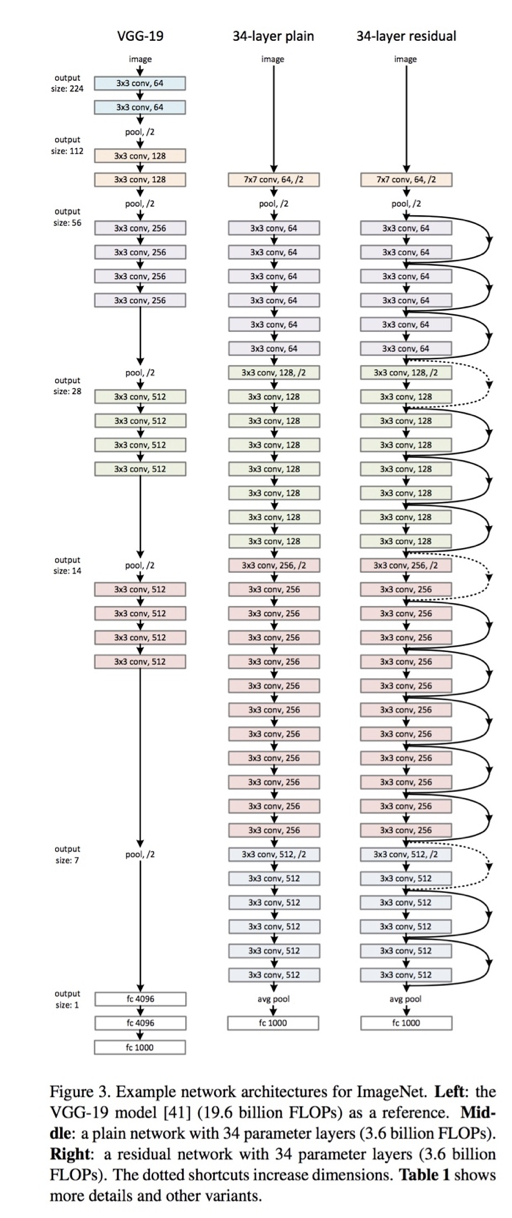

In [12]:
Image(filename = r'C:\Users\sidha\Desktop\cnn_tensorflow\images\resnet.png')

Finally, we will create a residual convolutional network (ResNet). The basic elements of a ResNet are:

    1. A stem convolutional group of 7x7 filter size.
    2. A sequence of residual blocks, where each doubles the number of filters.
        A. Each residual block consists of two 3x3 filters, w/o max pooling.
        B. The input to the residual block is added to the output.
    3. Between residual blocks is a convolutional block that doubles the number of 
       filters from the previous block, so the number of filters coming in and going 
       out are the same for the identity link matrix add operation.
        A. Each convolutional block consists of two 3x3 filters, but uses stride=2 
           to downsample the size of the feature maps.

You will need to:

    1. Save the input to the residual block for the identity link.
    2. Complete the matrix add of the identity link to the output of the residual block.
    3. Set (double) the filters for the convolutional block between residual block groups to match filter sizes for matrix add operations.
    4. Add the global averaging layer between the feature learning groups and the classifier.

In [5]:
def residual_block(n_filters, x):
    """ Create a Residual Block of Convolutions
        n_filters: number of filters
        x        : input into the block
    """
    shortcut = x
    x = layers.Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",  activation="relu")(x)
    x = layers.Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same",  activation="relu")(x)
    x = layers.Add([shortcut, x])
    return x

def conv_block(n_filters, x):
    """ Create Block of Convolutions without Pooling
        n_filters: number of filters
        x        : input into the block
    """
    x = layers.Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same", activation="relu")(x)
    x = layers.Conv2D(n_filters, (3, 3), strides=(2, 2), padding="same", activation="relu")(x)
    return x


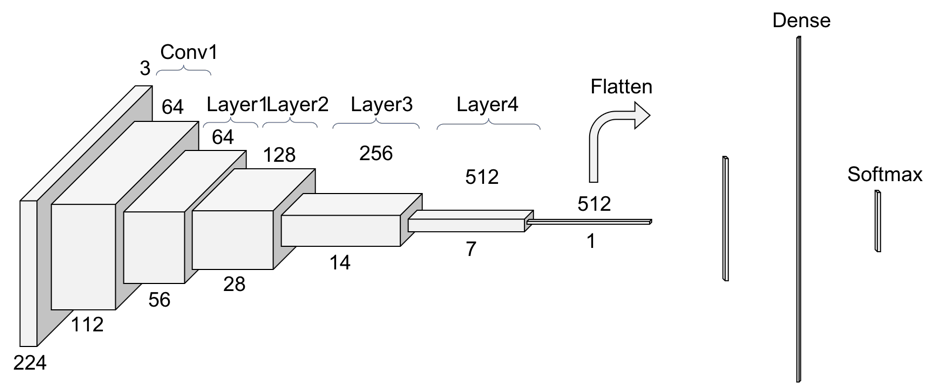

In [16]:
Image(filename = r'C:\Users\sidha\Desktop\cnn_tensorflow\images\resnet34_simplified.png')

In [20]:
# input tensor
inputs = layers.Input(shape=(224,224,3))

x = layers.Conv2D(64,kernel_size=(7,7), strides=(2,2), padding='same', activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

# first residual block group of 64 filters
for _ in range(3):
    x = residual_block(64, x)

# adding the convolution block
# double the size of filters and reduce feature maps by 75% to fit the next residual group
x = conv_block(128, x)

for _ in range(3):
    x = residual_block(128, x)
x = conv_block(256, x)

for _ in range(5):
    x = residual_block(256, x)
x = conv_block(512, x)

for _ in range(2):
    x = residual_block(512, x)
    
## Add a Global Averaging Pooling (inplace of a Flatten) at the end of all the convolutional residual blocks

x = layers.GlobalAveragePooling2D()(x)

# Final Dense Output Layer for 1000 outputs
outputs = layers.Dense(1000, activation='softmax')(x)

model = Model(inputs, outputs)

In [21]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 112, 112, 64) 9472        input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 56, 56, 64)   0           conv2d_36[0][0]                  
__________________________________________________________________________________________________
conv2d_37 (Conv2D)              (None, 56, 56, 64)   36928       max_pooling2d_2[0][0]            
____________________________________________________________________________________________

In [22]:
def makeVGG6():
    def conv_block(n_layers, n_filters):
        """
            n_layers : number of convolutional layers
            n_filters: number of filters
        """
        for n in range(n_layers):
            model.add(Conv2D(n_filters, kernel_size= (3, 3), strides=(1, 1), padding="same",activation="relu"))
        model.add(MaxPooling2D(2, strides=2))
        
    model = Sequential()
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation="relu", input_shape=(32, 32, 3)))

    # These are the convolutional groups
    conv_block(1, 64)
    conv_block(2, 128)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model



In [25]:
def makeVGG10():
    def conv_block(n_layers, n_filters):
        """
            n_layers : number of convolutional layers
            n_filters: number of filters
        """
        for n in range(n_layers):
            model.add(Conv2D(n_filters, kernel_size= (3, 3), strides=(1, 1), padding="same",activation="relu"))
        model.add(MaxPooling2D(2, strides=2))
        
    model = Sequential()
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation="relu", input_shape=(32, 32, 3)))

    # These are the convolutional groups
    conv_block(1, 64)
    conv_block(2, 128)
    conv_block(3, 256)
    
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
    
    return model

In [26]:
vgg6 = makeVGG6()
vgg10 = makeVGG10()

In [32]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 73s 0us/step


NameError: name 'np' is not defined

In [34]:
x_train = (x_train / 255.0).astype(np.float32)

In [45]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
vgg6.fit(x_train, y_train, epochs=3, batch_size=32, validation_split=0.1, verbose=1)


Train on 45000 samples, validate on 5000 samples
Epoch 1/3
45000/45000 [==============================] - 3406s 76ms/sample - loss: 1.3596 - acc: 0.5055 - val_loss: 1.0566 - val_acc: 0.6282
Epoch 2/3
 6816/45000 [===>..........................] - ETA: 8:03 - loss: 0.9348 - acc: 0.6655

In [ ]:
vgg10.fit(x_train, y_train, epochs=3, batch_size=32, validation_split=0.1, verbose=1)
